In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import networkx as nx
import seaborn as sns
import collections

sns.set()

%reload_ext lab_black

# Diameter of the graph

In [3]:
actors_agg_adj = np.load("sparse_agg_actor_adj.npy")
actors_graph = nx.from_numpy_matrix(actors_agg_adj)

In [4]:
print(f"The diameter of the graph is: {nx.diameter(actors_graph)}")

The diameter of the graph is: 4


# Sparsity of the graph

#### HeatMap

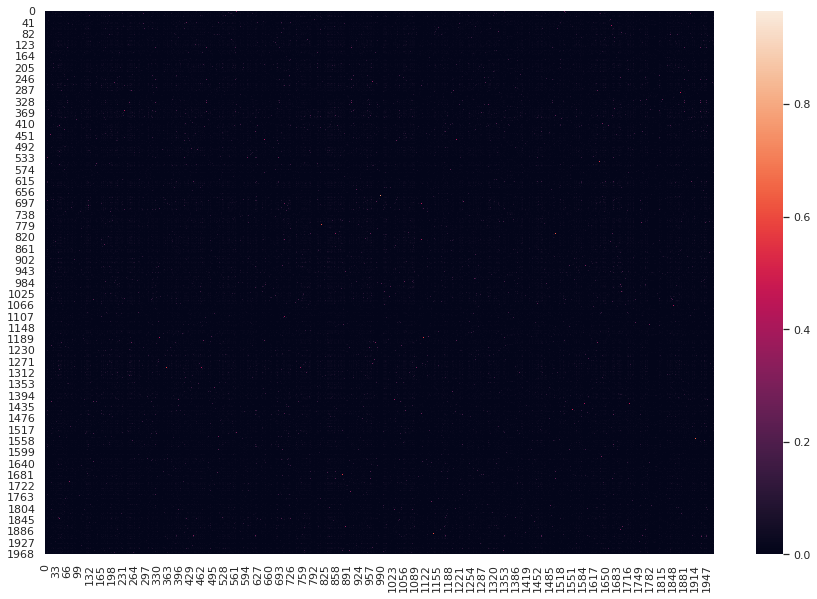

In [80]:
plt.figure(figsize=(15, 10))
sns.heatmap(actors_agg_adj)

### Sparsity 

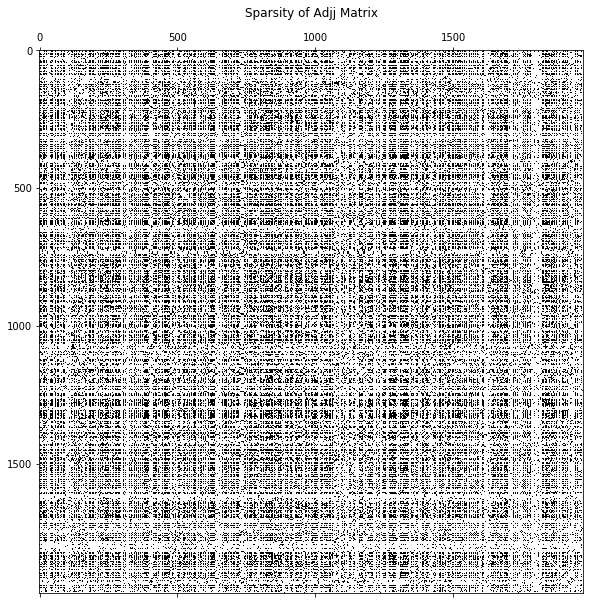

In [6]:
plt.figure(figsize=(15, 10))
plt.spy(actors_agg_adj)
plt.title("Sparsity of Adjj Matrix")
plt.savefig("plots/sparsity_adjj.pdf")
plt.show()

# Connected components

In [7]:
connected_components = nx.number_connected_components(actors_graph)
connected_components

1

# Degree Distribution

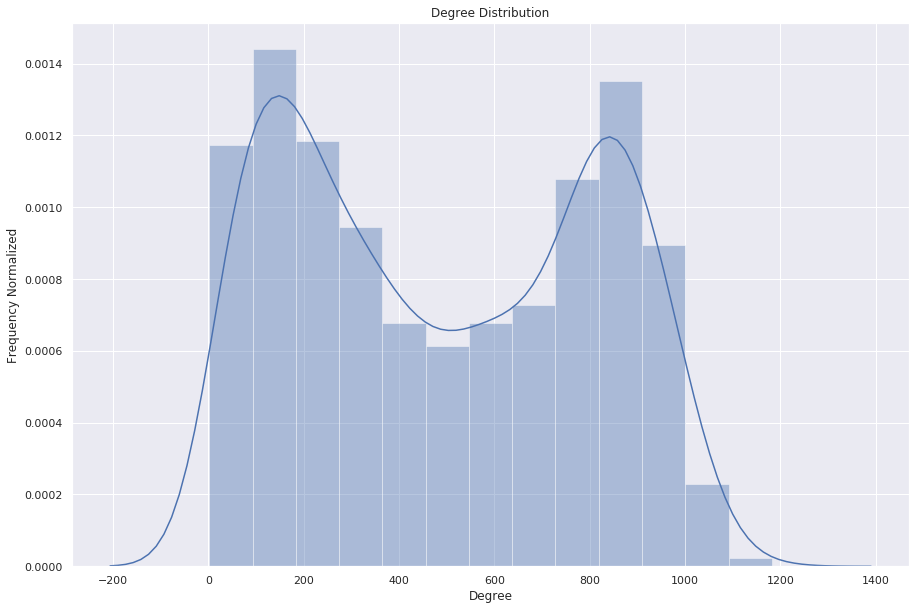

In [98]:
degree_sequence = sorted([d for n, d in actors_graph.degree()], reverse=True)

plt.figure(figsize=(15, 10))
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("Frequency Normalized")
ax = sns.distplot(degree_sequence, kde=True)
plt.savefig("plots/degree_distribution.pdf")

# Spectrum

In [46]:
lamb_comb = nx.laplacian_spectrum(actors_graph)
lamb_norm = nx.normalized_laplacian_spectrum(actors_graph)

In [87]:
spectrum = pd.DataFrame(
    {"laplacian": lamb_comb, "normalized_laplacian": lamb_norm}
)
spectrum

,laplacian_spectrum,normalized_laplacian_spectrum
0,1.126876e-14,-7.771561e-16
1,2.892970e-02,1.439692e-01
2,4.799864e-02,1.940691e-01
3,1.165300e-01,2.328859e-01
4,1.188756e-01,2.482952e-01
...,...,...
1966,2.453037e+01,1.408994e+00
1967,2.459368e+01,1.449695e+00
1968,2.483973e+01,1.469303e+00
1969,2.500760e+01,1.485537e+00


In [ ]:
plt.figure(figsize=(15, 10))
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues $L_{comb}$ and $L_{norm}$")
sns.lineplot(data=spectrum)
plt.savefig("plots/both_spectrum.pdf")

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues $L_{comb}$")
sns.lineplot("index", "laplacian_spectrum", data=spectrum.reset_index())
plt.savefig("plots/laplacian_spectrum.pdf")

In [ ]:
plt.figure(figsize=(15, 10))
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues $L_{norm}$")
sns.lineplot("index", "normalized_laplacian_spectrum", data=spectrum.reset_index())
plt.savefig("plots/normalized_laplacian_spectrum.pdf")

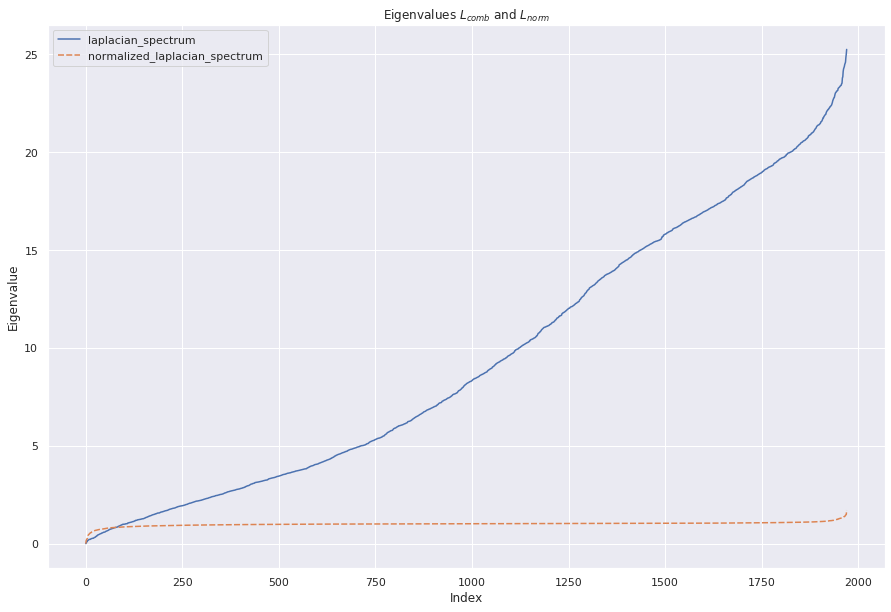

In [99]:
# Average Degree

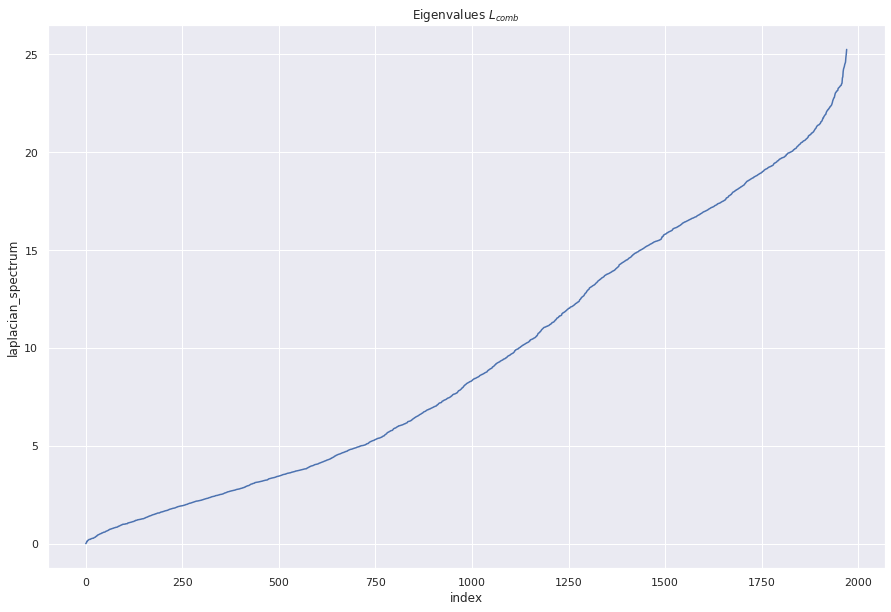

In [96]:
plt.figure(figsize=(15, 10))
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues $L_{comb}$")
sns.lineplot("index", "laplacian_spectrum", data=spectrum.reset_index())
plt.savefig("plots/laplacian_spectrum.pdf")

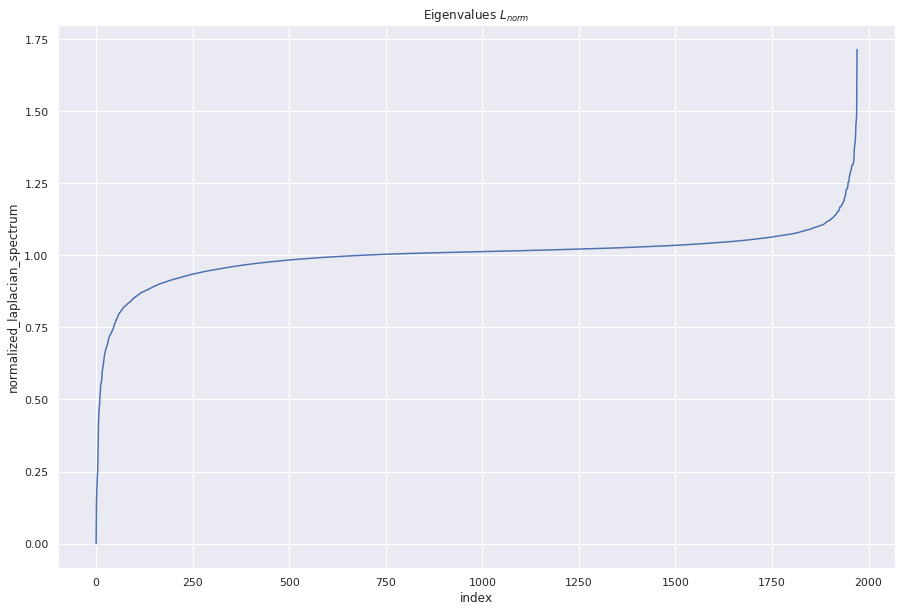

In [95]:
plt.figure(figsize=(15, 10))
plt.xlabel("Index")
plt.ylabel("Eigenvalue")
plt.title("Eigenvalues $L_{norm}$")
sns.lineplot("index", "normalized_laplacian_spectrum", data=spectrum.reset_index())
plt.savefig("plots/normalized_laplacian_spectrum.pdf")

# Average Degree

In [10]:
average_degree = nx.average_degree_connectivity(actors_graph)
# average_degree
dict(list(average_degree.items())[0:10])

{140: 394.49857142857144,
 563: 756.8809946714032,
 351: 670.6809116809117,
 63: 402.010582010582,
 203: 549.9573070607553,
 784: 790.4406887755102,
 147: 316.9374149659864,
 926: 743.5467062634989,
 803: 750.0398505603985,
 698: 774.8638968481375}

# Plot the Graph

In [ ]:
# write in gefx format
DATA_PATH = "data"
nx.write_gexf(actors_graph, f"{DATA_PATH}/initial_graph.gexf")

In [11]:
nx.draw(actors_graph)

/home/arielalba/miniconda3/envs/ntds_2019/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


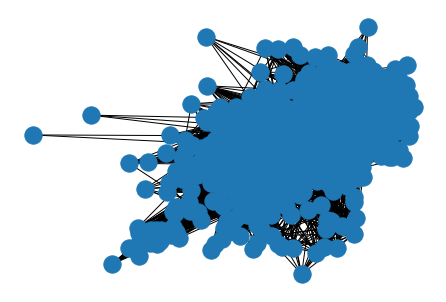

In [12]:
nx.draw(actors_graph)

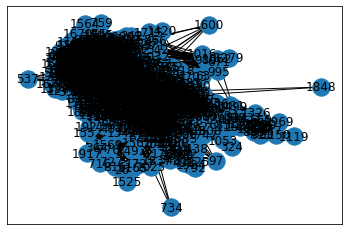

In [13]:
nx.draw_networkx(actors_graph)

In [14]:
# # Graph-tool
# g = Graph()
# g.add_edge_list(np.transpose(actors_agg_adj[100:200, 100:200].nonzero()))

In [15]:
# gt.draw.graph_draw(g, fmt="png", output_size=(600, 600))

In [16]:
Gc_actors = max(nx.connected_component_subgraphs(actors_graph), key=len)
nb_edges_gc = Gc_actors.number_of_edges()
nb_nodes_gc = Gc_actors.number_of_nodes()
coords_Gc = nx.spring_layout(Gc_actors, k=0.03)

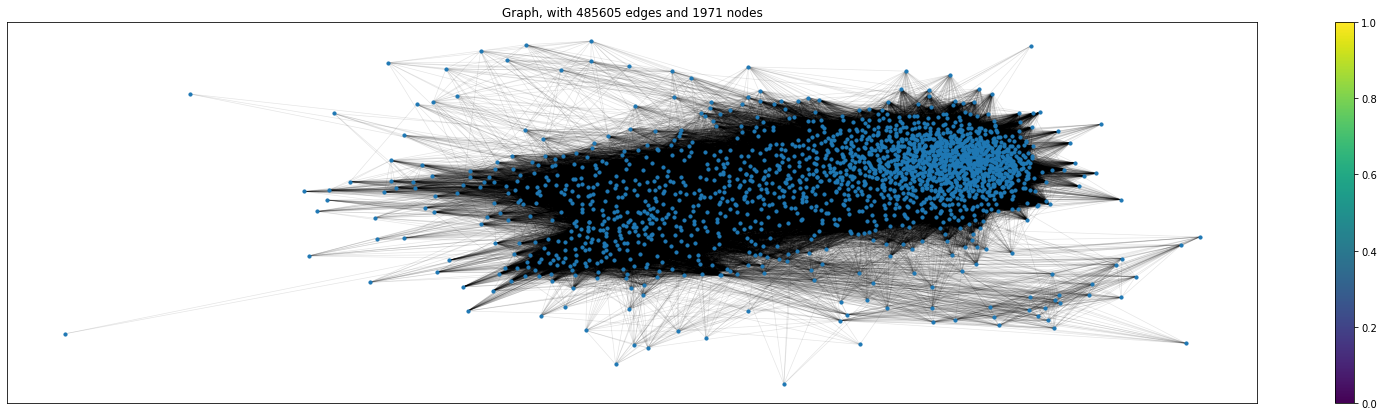

In [17]:
plt.figure(figsize=(28, 7))
im = nx.draw_networkx_nodes(
    Gc_actors, coords_Gc, node_size=10, cmap="tab20", vmin=0, vmax=20
)
nx.draw_networkx_edges(Gc_actors, coords_Gc, alpha=0.1, width=0.7)
plt.title("Graph, with {} edges and {} nodes".format(nb_edges_gc, nb_nodes_gc))
plt.colorbar(im)
plt.savefig("plots/graph")
plt.show()